In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from wordcloud import WordCloud,STOPWORDS
import string
import re

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_context('notebook')
sns.set_style('darkgrid')
sns.set_palette('rainbow')

In [2]:
books= pd.read_csv(r'C:\Users\SASWATI BANERJEE\OneDrive\My_Placement\practice_dataset\ML_Input_Folder\Books.csv')
users= pd.read_csv(r'C:\Users\SASWATI BANERJEE\OneDrive\My_Placement\practice_dataset\ML_Input_Folder\Users.csv')
ratings=pd.read_csv(r'C:\Users\SASWATI BANERJEE\OneDrive\My_Placement\practice_dataset\ML_Input_Folder\Ratings.csv')

In [3]:
book_cols = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
books.columns = book_cols

In [4]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
user_cols = ['userId','location','age']
users.columns = user_cols

In [6]:
users.head()

,userId,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
rating_cols = ['userId','ISBN','bookRating']
ratings.columns = rating_cols

In [8]:
ratings.head()

,userId,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [9]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [10]:
books.isnull().sum()

ISBN                 0
bookTitle            0
bookAuthor           1
yearOfPublication    0
publisher            2
imageUrlS            0
imageUrlM            0
imageUrlL            3
dtype: int64

In [11]:
users.isnull().sum()

userId           0
location         0
age         110762
dtype: int64

In [12]:
ratings.isnull().sum()

userId        0
ISBN          0
bookRating    0
dtype: int64

In [13]:
books.duplicated().sum()

0

In [14]:
ratings.duplicated().sum()

0

In [15]:
users.duplicated().sum()

0

In [16]:
books.yearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [17]:
books.loc[books.yearOfPublication == 'DK Publishing Inc',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [18]:
books.loc[books.yearOfPublication == 'Gallimard',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [19]:
books.loc[books.ISBN == '078946697X','imageUrlL'] = 'http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg'
books.loc[books.ISBN == '078946697X','imageUrlM'] = 'http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg'
books.loc[books.ISBN == '078946697X','imageUrlS'] = 'http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg'
books.loc[books.ISBN == '078946697X','publisher'] = 'DK Publishing Inc'
books.loc[books.ISBN == '078946697X','yearOfPublication'] = '2000'
books.loc[books.ISBN == '078946697X','bookAuthor'] = 'Michael Teitelbaum'
books.loc[books.ISBN == '078946697X','bookTitle'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'

In [20]:
books.loc[books.ISBN == '0789466953','imageUrlL'] = 'http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg'
books.loc[books.ISBN == '0789466953','imageUrlM'] = 'http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg'
books.loc[books.ISBN == '0789466953','imageUrlS'] = 'http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg'
books.loc[books.ISBN == '0789466953','publisher'] = 'DK Publishing Inc'
books.loc[books.ISBN == '0789466953','yearOfPublication'] = '2000'
books.loc[books.ISBN == '0789466953','bookAuthor'] = 'James Buckley'
books.loc[books.ISBN == '0789466953','bookTitle'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

In [21]:
books.loc[books.ISBN == '2070426769','imageUrlL'] = 'http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg'
books.loc[books.ISBN == '2070426769','imageUrlM'] = 'http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg'
books.loc[books.ISBN == '2070426769','imageUrlS'] = 'http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg'
books.loc[books.ISBN == '2070426769','publisher'] = 'Gallimard'
books.loc[books.ISBN == '2070426769','yearOfPublication'] = '2003'
books.loc[books.ISBN == '2070426769','bookAuthor'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'
books.loc[books.ISBN == '2070426769','bookTitle'] = "Peuple du ciel, suivi de 'Les Bergers"

In [22]:
books_data = books[['ISBN', 'bookTitle','imageUrlS', 'imageUrlM', 'imageUrlL']]
books = books[['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher']]

In [23]:
books.loc[(books.ISBN == '2070426769') | (books.ISBN == '078946697X') | (books.ISBN == '0789466953'),: ]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc


In [24]:
books.yearOfPublication = pd.to_numeric(books.yearOfPublication, errors='coerce')

In [25]:
books.loc[(books.yearOfPublication > 2006) | (books.yearOfPublication == 0),'yearOfPublication'] = np.NAN

In [26]:
books.yearOfPublication.fillna(round(books.yearOfPublication.mean()),inplace=True)
convert_dict = {'yearOfPublication': np.int64,}
books = books.astype(convert_dict)

In [27]:
books.loc[books.publisher.isnull(),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [28]:
books.loc[(books.bookTitle == 'Tyrant Moon'),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN


In [29]:
books.loc[(books.bookTitle == 'Finders Keepers'),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
10799,082177364X,Finders Keepers,Fern Michaels,2002,Zebra Books
42019,0070465037,Finders Keepers,Barbara Nickolae,1989,McGraw-Hill Companies
58264,0688118461,Finders Keepers,Emily Rodda,1993,Harpercollins Juvenile Books
66678,1575663236,Finders Keepers,Fern Michaels,1998,Kensington Publishing Corporation
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN
134309,0156309505,Finders Keepers,Will,1989,Voyager Books
173473,0973146907,Finders Keepers,Sean M. Costello,2002,Red Tower Publications
195885,0061083909,Finders Keepers,Sharon Sala,2003,HarperTorch
211874,0373261160,Finders Keepers,Elizabeth Travis,1993,Worldwide Library


In [30]:
books.loc[(books.bookAuthor == 'Elaine Corvidae') | (books.bookAuthor == 'Linnea Sinclair'),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
126762,1931696934,Winter's Orphans,Elaine Corvidae,2001,Novelbooks
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129001,0759901880,Wolfkin,Elaine Corvidae,2001,Hard Shell Word Factory
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [31]:
books.loc[(books.ISBN == '193169656X'),'publisher'] = 'Unknown'
books.loc[(books.ISBN == '1931696993'),'publisher'] = 'Unknown'

In [32]:
books.loc[books.bookAuthor.isnull(),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [33]:
books.loc[(books.ISBN == '9627982032'),'bookAuthor'] = 'Unknown'

In [34]:
users.loc[(users.age > 90) | (users.age < 4), 'age'] = np.nan

In [35]:
users.age = users.age.fillna(users.age.mean())
users.age = users.age.astype(np.int64)

In [36]:
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]

In [37]:
ratings_new = ratings_new[ratings_new.userId.isin(users.userId)]

In [38]:
rating_explicit = ratings_new.loc[ratings_new.bookRating != 0, :]
rating_implicit = ratings_new.loc[ratings_new.bookRating == 0, :]
print("Explicit Ratings data shape = " + str(rating_explicit.shape) + "\nImplicit Ratings data shape = " + str(rating_implicit.shape))

Explicit Ratings data shape = (383842, 3)
Implicit Ratings data shape = (647294, 3)


In [39]:
rating_explicit

,userId,ISBN,bookRating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
8,276744,038550120X,7
16,276747,0060517794,9
...,...,...,...
1149771,276704,0743211383,7
1149773,276704,0806917695,5
1149775,276704,1563526298,9
1149777,276709,0515107662,10


##EDA performance

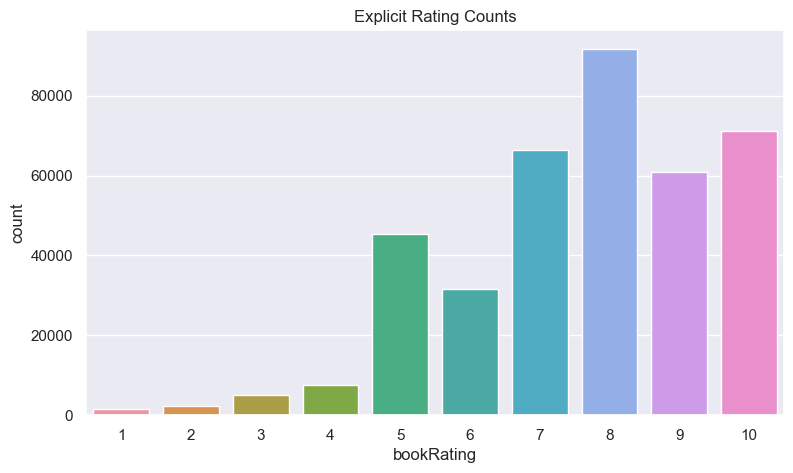

In [40]:
plt.figure(figsize=(9, 5))
plt.title('Explicit Rating Counts')
sns.countplot(x = 'bookRating', data = rating_explicit);

In [41]:
merged_data = pd.merge(books, ratings_new, on='ISBN')
merged_data =  merged_data.sort_values('ISBN', ascending=True)
merged_data.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,userId,bookRating
1013651,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967,Simon &amp; Schuster,171118,8
968138,0001010565,Mog's Christmas,Judith Kerr,1992,Collins,86123,0
968139,0001010565,Mog's Christmas,Judith Kerr,1992,Collins,209516,0
542150,0001046438,Liar,Stephen Fry,1994,Harpercollins Uk,23902,9
788100,0001046713,Twopence to Cross the Mersey,Helen Forrester,1992,HarperCollins Publishers,196149,0


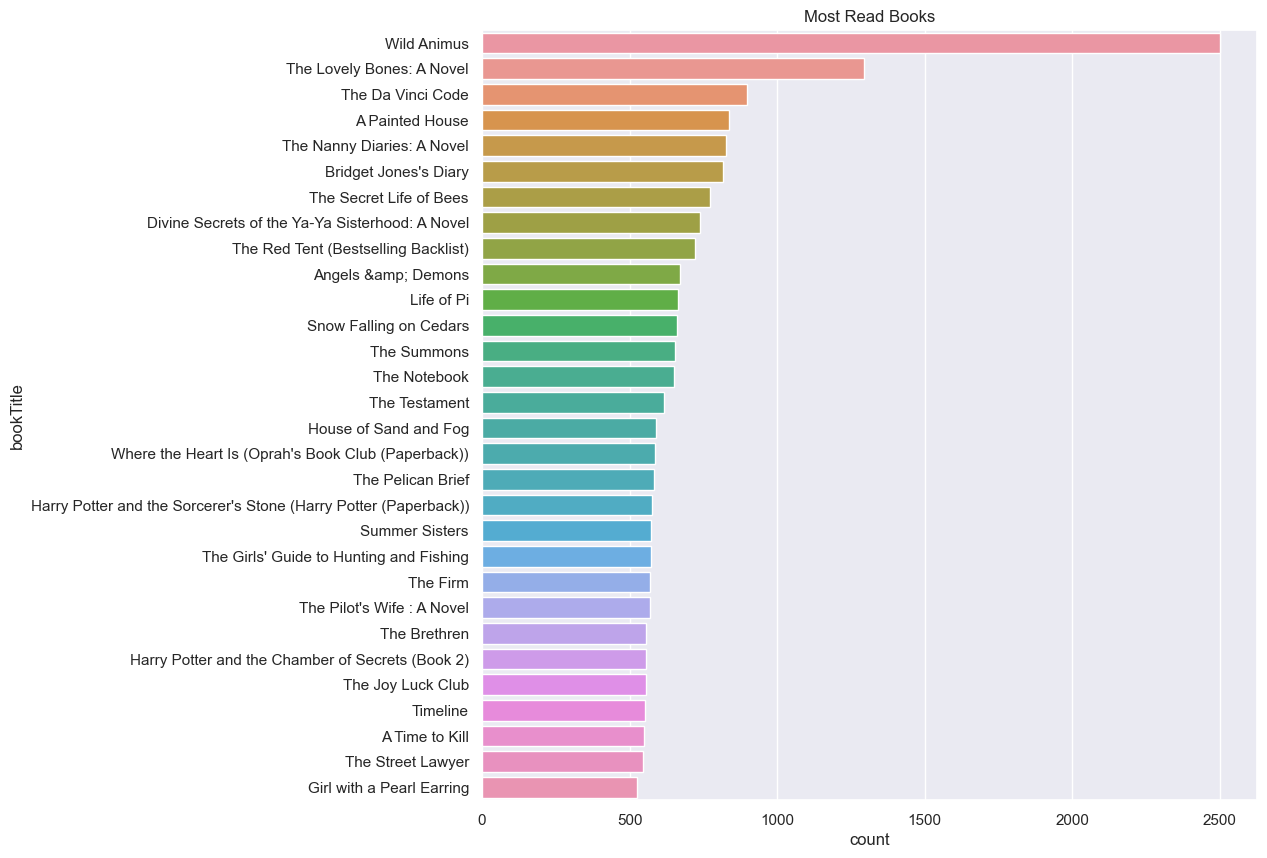

In [42]:
most_read = merged_data.bookTitle.value_counts().reset_index()
most_read.columns = ['bookTitle','count']

plt.figure(figsize = (10,10))
plt.title("Most Read Books")
sns.barplot(x = 'count', y = 'bookTitle', data = most_read.head(30));

In [43]:
top_rated = merged_data[['bookTitle','bookRating']]
top_rated = top_rated.groupby('bookTitle', as_index=False)['bookRating'].mean()
top_rated = top_rated.sort_values('bookRating',ascending=False).reset_index()
top_rated = top_rated[['bookTitle','bookRating']]

top_rated.head()

,bookTitle,bookRating
0,Film Is: The International Free Cinema,10.0
1,More Secrets of Happy Children: Embrace Your P...,10.0
2,Jo's Boys : From the Original Publisher,10.0
3,The Vanished Priestess : An Annie Szabo Mystery,10.0
4,Game and Hunting,10.0


In [44]:
top_rated.tail()

,bookTitle,bookRating
241066,Invaders of the Planet Earth (Choose Your Own ...,0.0
241067,Sammy Discovers the Alphabet (Learn-With-Sammy),0.0
241068,Sammy Carducci's Guide to Women,0.0
241069,Sammle mir Kiesel am FluÃ?Â?. Mehr als eine Li...,0.0
241070,TRAVELLING MAN,0.0


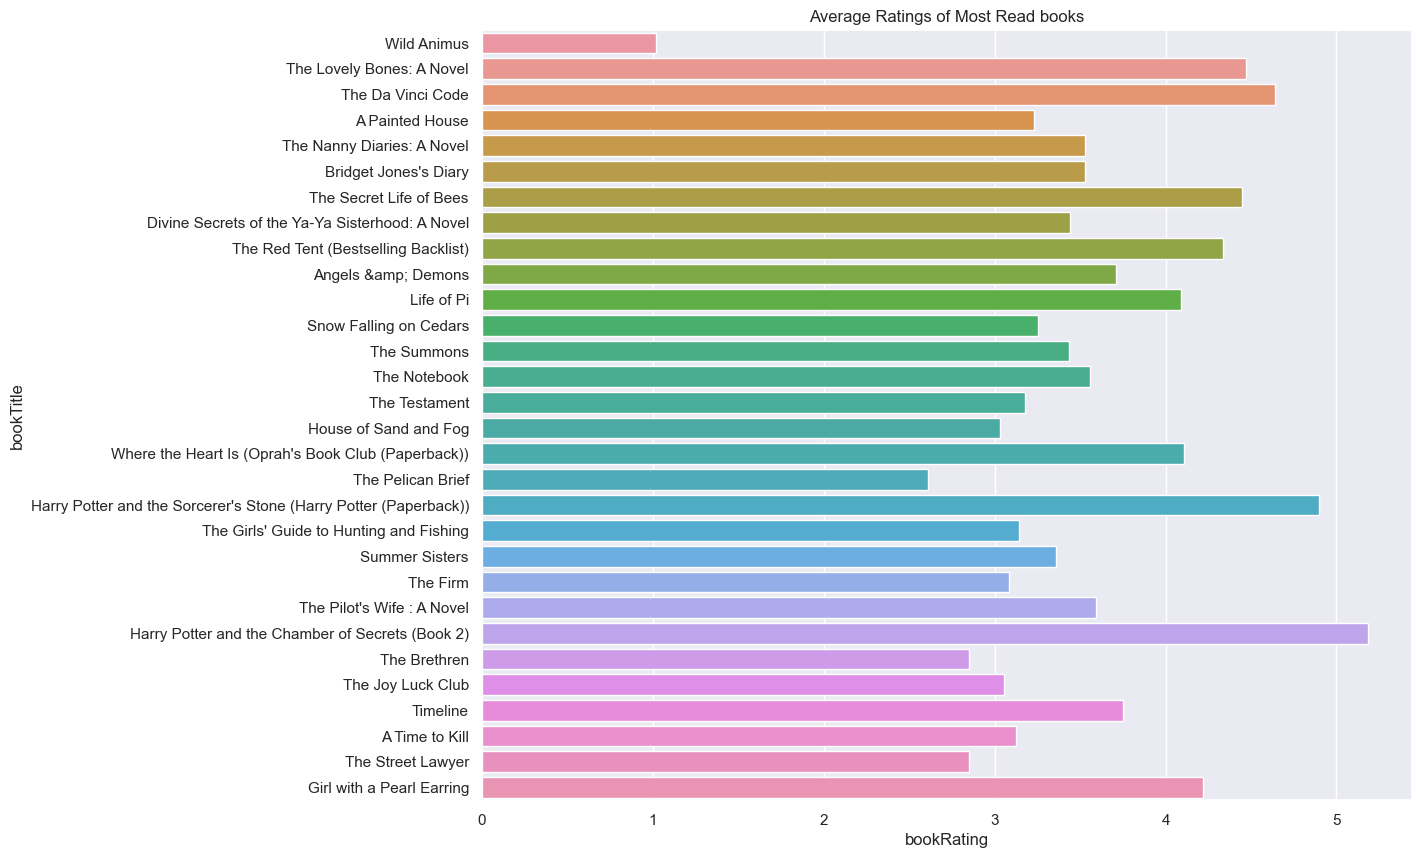

In [45]:
avg_data = merged_data.groupby('bookTitle', as_index=False)['bookRating'].mean()
temp = merged_data.bookTitle.value_counts().reset_index()
temp.columns = ['bookTitle','count']
most_rated_by_reads = pd.merge(avg_data,temp,on='bookTitle')

most_rated_by_reads = most_rated_by_reads.sort_values('count',ascending=False)

plt.figure(figsize=(12,10))
plt.title("Average Ratings of Most Read books")
sns.barplot(x = 'bookRating', y = 'bookTitle', data = most_rated_by_reads.head(30));

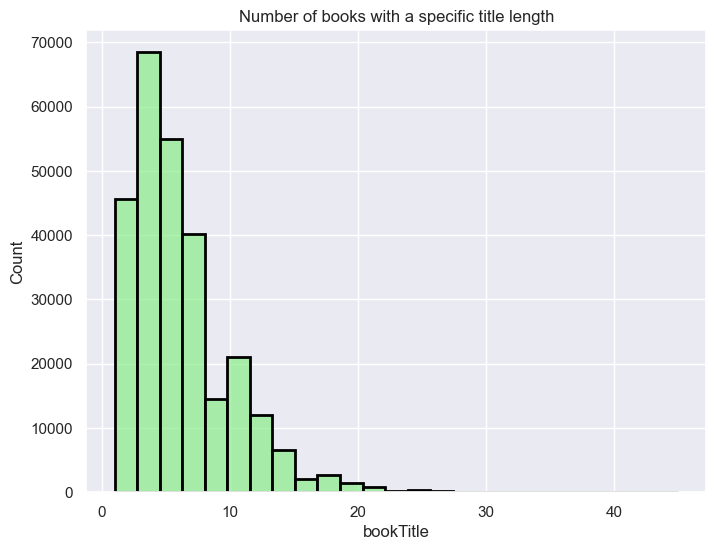

In [46]:
title_length = books.bookTitle.str.split().map(lambda x: len(x))
plt.figure(figsize=(8,6))
plt.title('Number of books with a specific title length')
sns.histplot(title_length, bins=25, color = 'lightgreen', linewidth = 2, edgecolor = 'black');

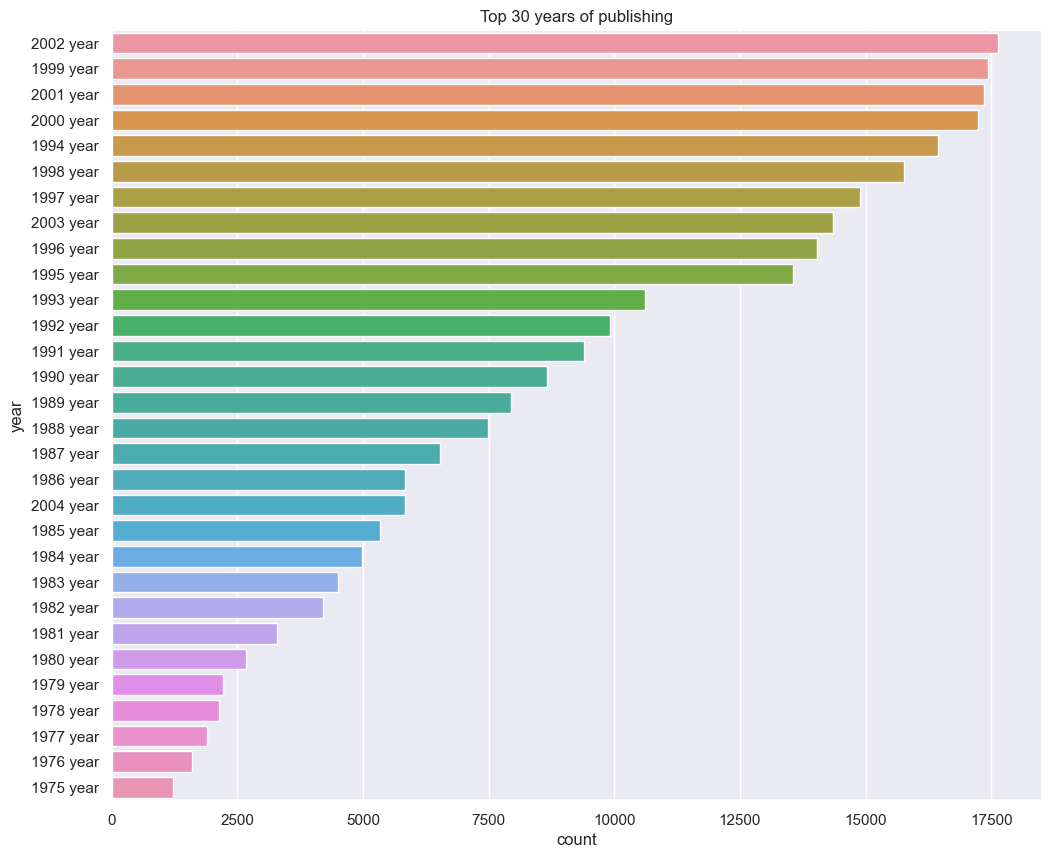

In [47]:
yearOP = books['yearOfPublication'].value_counts().reset_index()

yearOP.columns = ['value', 'count']

yearOP['year'] = yearOP['value'].astype(str) + ' year'

yearOP = yearOP.sort_values('count',ascending=False)

plt.figure(figsize=(12,10))
plt.title('Top 30 years of publishing')
sns.barplot(data = yearOP.head(30), x='count', y="year");

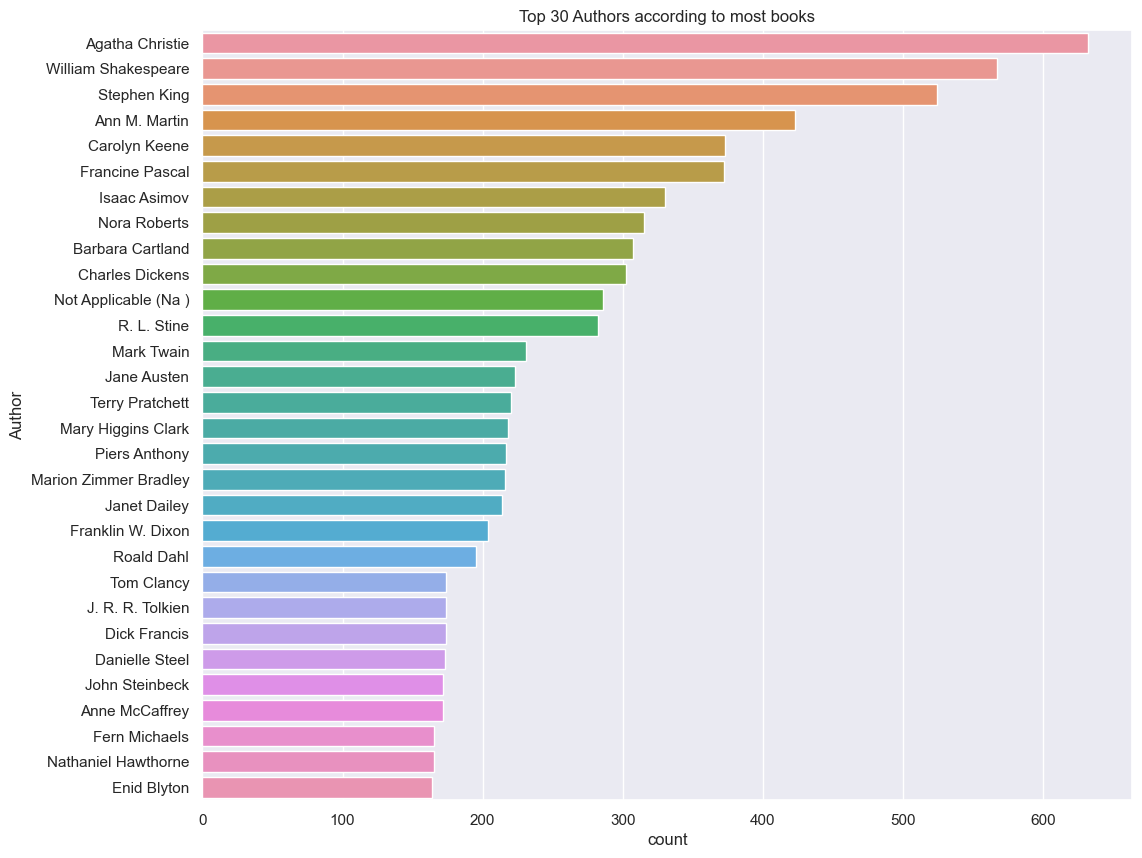

In [48]:
top_author = books['bookAuthor'].value_counts().reset_index()
top_author.columns = ['Author', 'count']
top_author['Author'] = top_author['Author']
top_author = top_author.sort_values('count',ascending=False)

plt.figure(figsize=(12,10))
plt.title('Top 30 Authors according to most books')
sns.barplot(data = top_author.head(30), x = 'count', y = 'Author');

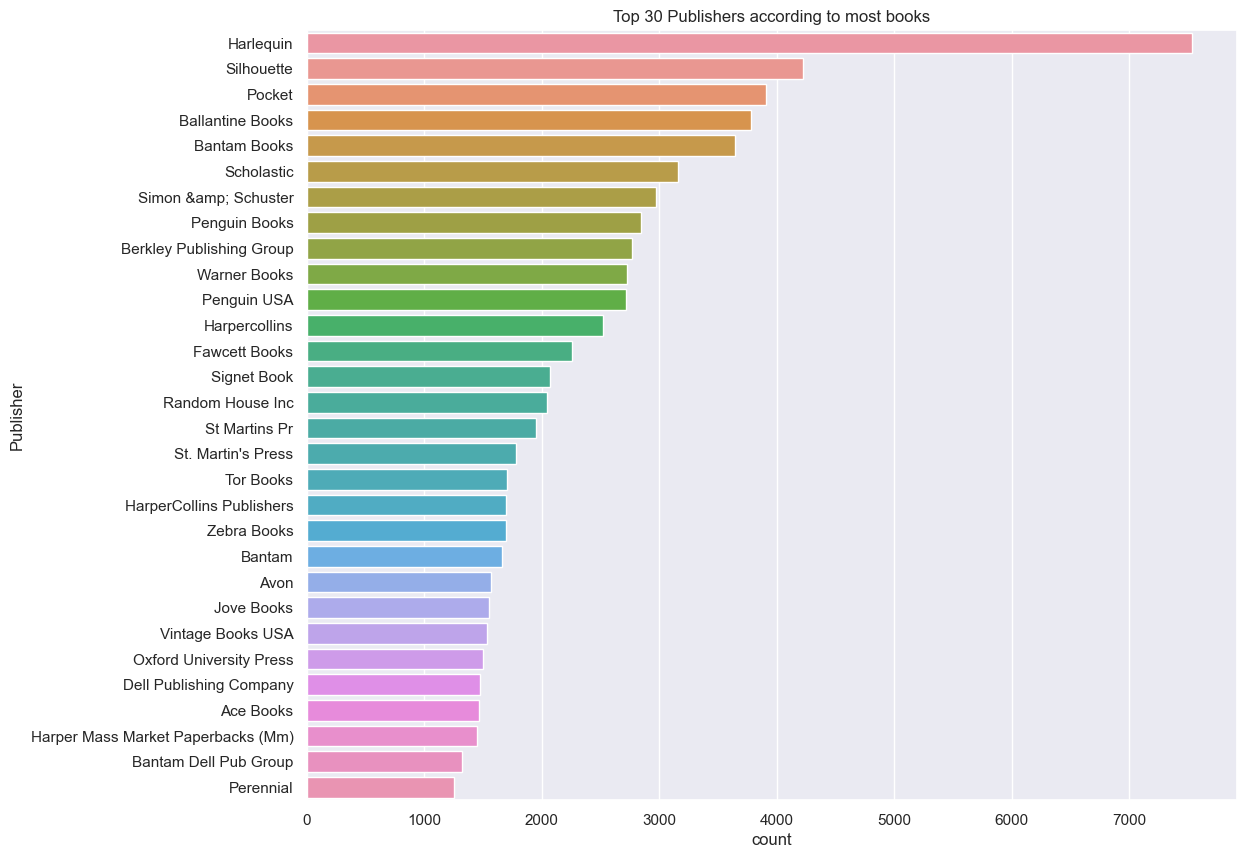

In [49]:
top_publisher = books['publisher'].value_counts().reset_index()
top_publisher.columns = ['Publisher', 'count']
top_publisher['Publisher'] = top_publisher['Publisher']
top_publisher = top_publisher.sort_values('count',ascending=False)

plt.figure(figsize=(12,10))
plt.title('Top 30 Publishers according to most books')
sns.barplot(data = top_publisher.head(30), x = 'count', y = 'Publisher');

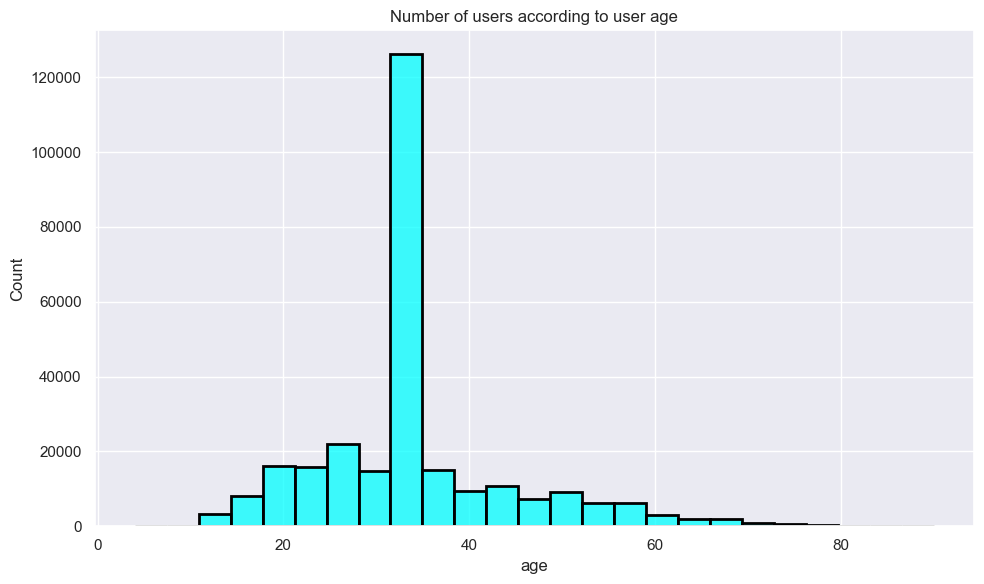

In [50]:
user_age = users.age
plt.figure(figsize=(10,6), tight_layout=True)
plt.title('Number of users according to user age')
sns.histplot(user_age, bins=25, linewidth = 2, color = 'cyan', edgecolor = 'black');

### popularity based recommendation system

In [57]:
ratings_data = ratings_data[ratings_data['bookRating'].isin(counts[counts >= 100].index)]
ratings_data

,userId,ISBN,bookRating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0
...,...,...,...
1149633,276680,1884910033,0
1149634,276680,1888173408,7
1149635,276680,1888173564,8
1149636,276680,1888173572,0


In [58]:
merged_new = pd.merge(ratings_data,books,on='ISBN')
columns = ['yearOfPublication', 'publisher', 'bookAuthor']
merged_new = merged_new.drop(columns, axis=1)

In [59]:
number_rating = merged_new.groupby('bookTitle')['bookRating'].count().reset_index()
number_rating.rename(columns={'bookRating':'number of rating'},inplace=True)
number_rating.head()

,bookTitle,number of rating
0,A Light in the Storm: The Civil War Diary of ...,3
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [60]:
final_ratings = merged_new.merge(number_rating,on='bookTitle') 
final_ratings.head()

,userId,ISBN,bookRating,bookTitle,number of rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,101
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,101
2,10030,002542730X,7,Politically Correct Bedtime Stories: Modern Ta...,101
3,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,101
4,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,101


In [61]:
final_ratings = final_ratings[final_ratings['number of rating']>=50] 


In [62]:
print("Shape Before :" + str(final_ratings.shape))
final_ratings.drop_duplicates(['userId','bookTitle'],inplace=True)
print("Shape After  :" + str(final_ratings.shape))

Shape Before :(97872, 5)
Shape After  :(95423, 5)


In [63]:
book_pivot = final_ratings.pivot_table(columns='userId',index='bookTitle',values='bookRating')
book_pivot.shape

(1072, 1645)

In [64]:
book_pivot.fillna(0,inplace=True)
book_pivot

userId,254,507,882,1424,1435,1733,1903,2033,2110,2276,...,275020,275970,276463,276680,277427,277478,277639,278137,278188,278418
bookTitle,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### machine learning models 

In [65]:
book_sparse=csr_matrix(book_pivot)
model=NearestNeighbors(metric='cosine',algorithm='brute')
model.fit(book_sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

In [68]:
def recommend(book_name):
    book_id = np.where(book_pivot.index==book_name)[0][0]
    distances,suggestions=model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1),n_neighbors = 51)
    
    
    books=[]
    for i in range(len(suggestions)):
        if i==0:
            print("The suggestions for ",book_name,"are : ")
        if not i:
            books = book_pivot.index[suggestions[i]]
    for i in range(1,len(books)):
         print(str(i) + ": " + books[i] )       
                
            
recommend('The Sum of All Fears (Jack Ryan Novels)')

The suggestions for  The Sum of All Fears (Jack Ryan Novels) are : 
1: Executive Orders (Jack Ryan Novels)
2: Clear and Present Danger (Jack Ryan Novels)
3: The Road to Omaha
4: Debt of Honor (Jack Ryan Novels)
5: Critical Mass
6: Without Remorse
7: Red Storm Rising
8: Fat Tuesday
9: Patriot Games (Jack Ryan Novels)
10: The Chamber
11: Congo
12: The Bear and the Dragon (Jack Ryan Novels)
13: The Return of the King (The Lord of the Rings, Part 3)
14: The Celestine Prophecy (Celestine Prophecy)
15: Deception Point
16: The Beach House
17: The Testament
18: The House of Thunder
19: The First Counsel
20: Dark Rivers of the Heart
21: Alaska
22: Bleachers
23: TickTock
24: Mutation
25: The Client
26: The Summons
27: Mistaken Identity
28: Devices and Desires
29: 1st to Die: A Novel
30: The Key to Midnight
31: The Cardinal of the Kremlin (Jack Ryan Novels)
32: The Woman Next Door
33: Space
34: A Man in Full
35: Needful Things
36: And Then You Die
37: Hearts in Atlantis
38: Naked in Death
39: Sha